In [1]:
# """installs"""

# !pip install nc-time-axis
# !pip install netCDF4 h5netcdf
# !pip install xarray
# !pip install cdsapi
# !pip install networkx geopandas osmnx igraph matplotlib
# !pip install pysal scikit-learn libpysal tobler geopandas numpy pandas networkx
# !pip install access
# !pip install transliterate


In [2]:
import sys
from pathlib import Path

# Add parent directory to Python path to enable imports from scripts/
module_path = str(Path.cwd().parent)
if module_path not in sys.path:
    sys.path.append(module_path)


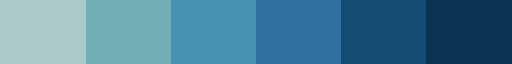

In [3]:
import scicolor

scicolor.get_cmap("Hokusai2")


In [4]:
# """
# проверить какой провижен новый или нет я юзаю
# """


In [5]:
import matplotlib.pyplot as plt

from constants import (
    START_YEAR,
    MONTHS_IN_YEAR,
    CONST_BASE_DEMAND,
    transport_modes,
    transport_modes_color,
    service_radius_minutes,
    transport_mode_name_mapper,
    service_list,
    threshold,
)
import scripts_old.provision as provision
from tqdm import tqdm

tqdm.pandas()


In [6]:
from calculator_this_pipeline import make_block_scheme


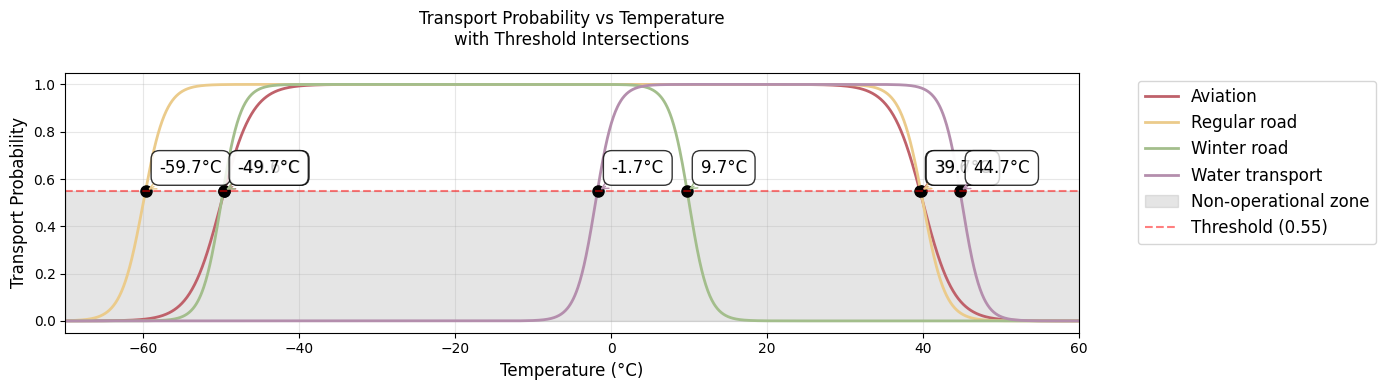

In [7]:
from plotter_transport_mode_prob import plot_transport_probability_legacy
from calculator_transport_prob import get_transport_probability

threshold_temperatures = plot_transport_probability_legacy(
    transport_modes,
    transport_modes_color,
    get_transport_probability,
    threshold,
    temps=None,
    font_size=12,
)


In [8]:
# """
# Добавить параллельно две карты:
# - Распределение сервисов каждой группы (вместе? как кружками?) по нп
# """


In [9]:
from preprocesser import get_data
from gcreator import make_g, add_temp_to_g
from plotter_network_basic import plot_transport_graph
from huston import call_nasa
from calculator_stat import create_agglomeration_network
from calculator_monthly_mode import create_df_modes_monthly_fixed
from plotter_heatmap import create_transport_mode_heatmaps
from plotter_heatmap_prov_node import plot_provision_evolution_by_node

# Store results for each settlement and service
all_results = {}
# yakut_chuk
# yanao_kras
# mezen

data_path = "/Users/test/Documents/code/iccs25/data/"

for SETTL_NAME in ["yanao_kras"]:
    print("=" * 10, SETTL_NAME, "=" * 10)

    # Initialize settlement results
    all_results[SETTL_NAME] = {}
    # service_list
    for SERVICE_NAME in service_list:
        print("||" * 10, SERVICE_NAME, "||" * 10)

        CLIMATE_DATA_FILE_NAME = f"df_climate_{SETTL_NAME}.csv"

        settl, df_service, transport_df, infr_df = get_data(
            data_path,
            SETTL_NAME,
            transport_mode_name_mapper,
            transport_modes,
            SERVICE_NAME,
        )
        blocks_gdf = make_block_scheme(settl, df_service, service_name=SERVICE_NAME)
        G_undirected = make_g(transport_df, transport_modes, blocks_gdf, settl)

        df_monthly_list = call_nasa(blocks_gdf, CLIMATE_DATA_FILE_NAME)
        G_undirected = add_temp_to_g(G_undirected, df_monthly_list)

        range_months = range(12)  # Starting 1982

        net = create_agglomeration_network(
            graph=G_undirected,
            threshold=threshold,
            probability_function=get_transport_probability,
            provision_calculator=provision.calculate_graph_provision,
        )

        net.run_all_steps(
            range_months,
            service_radius_minutes=service_radius_minutes[SETTL_NAME],
            base_demand=CONST_BASE_DEMAND,
            service_name=SERVICE_NAME,
            return_assignment=True,
        )

        # Store results for this service
        all_results[SETTL_NAME][SERVICE_NAME] = {
            "net": net,
            "stats": net.stats,
            "graphs": net.stats.graphs,
            "records": net.stats.records,
            "results": net.stats.results,
            "G_undirected": G_undirected,
        }

        # Предполагаем что индекс df_stats — это месяцы в виде `i` (0...len-1)
        df_stats = net.stats.records
        try:
            df_stats["Month"] = df_stats.index % MONTHS_IN_YEAR + 1
            df_stats["Year"] = START_YEAR + df_stats.index // MONTHS_IN_YEAR
        except Exception:
            pass

        df_modes_monthly = create_df_modes_monthly_fixed(
            G_undirected,
            transport_modes,
            threshold_temperatures,
            START_YEAR,
            MONTHS_IN_YEAR=12,
        )

        # Store df_modes_monthly as well
        all_results[SETTL_NAME][SERVICE_NAME]["df_modes_monthly"] = df_modes_monthly


========== yanao_kras ==========
|||||||||||||||||||| school ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00,  9.74it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| kindergarten ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00, 10.35it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| post ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00,  9.77it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| library ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00,  9.30it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| culture ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00,  9.86it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| atm ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00, 10.35it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| health ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00, 10.00it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| port ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00,  8.39it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| airport ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00,  8.94it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| shop ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00,  9.79it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
|||||||||||||||||||| pristan ||||||||||||||||||||


Running network analysis: 100%|██████████| 12/12 [00:01<00:00, 10.03it/s]


Input threshold_temperatures: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}
Detected operational ranges format - using directly
Final operational_ranges: {'Aviation': [(-49.6, 39.6)], 'Regular road': [(-59.7, 39.7)], 'Winter road': [(-49.7, 9.7)], 'Water transport': [(-1.7, 44.7)]}


/Users/test/Documents/code/iccs25/new_notebooks/plotter_multilayer_service_network.py:172: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(


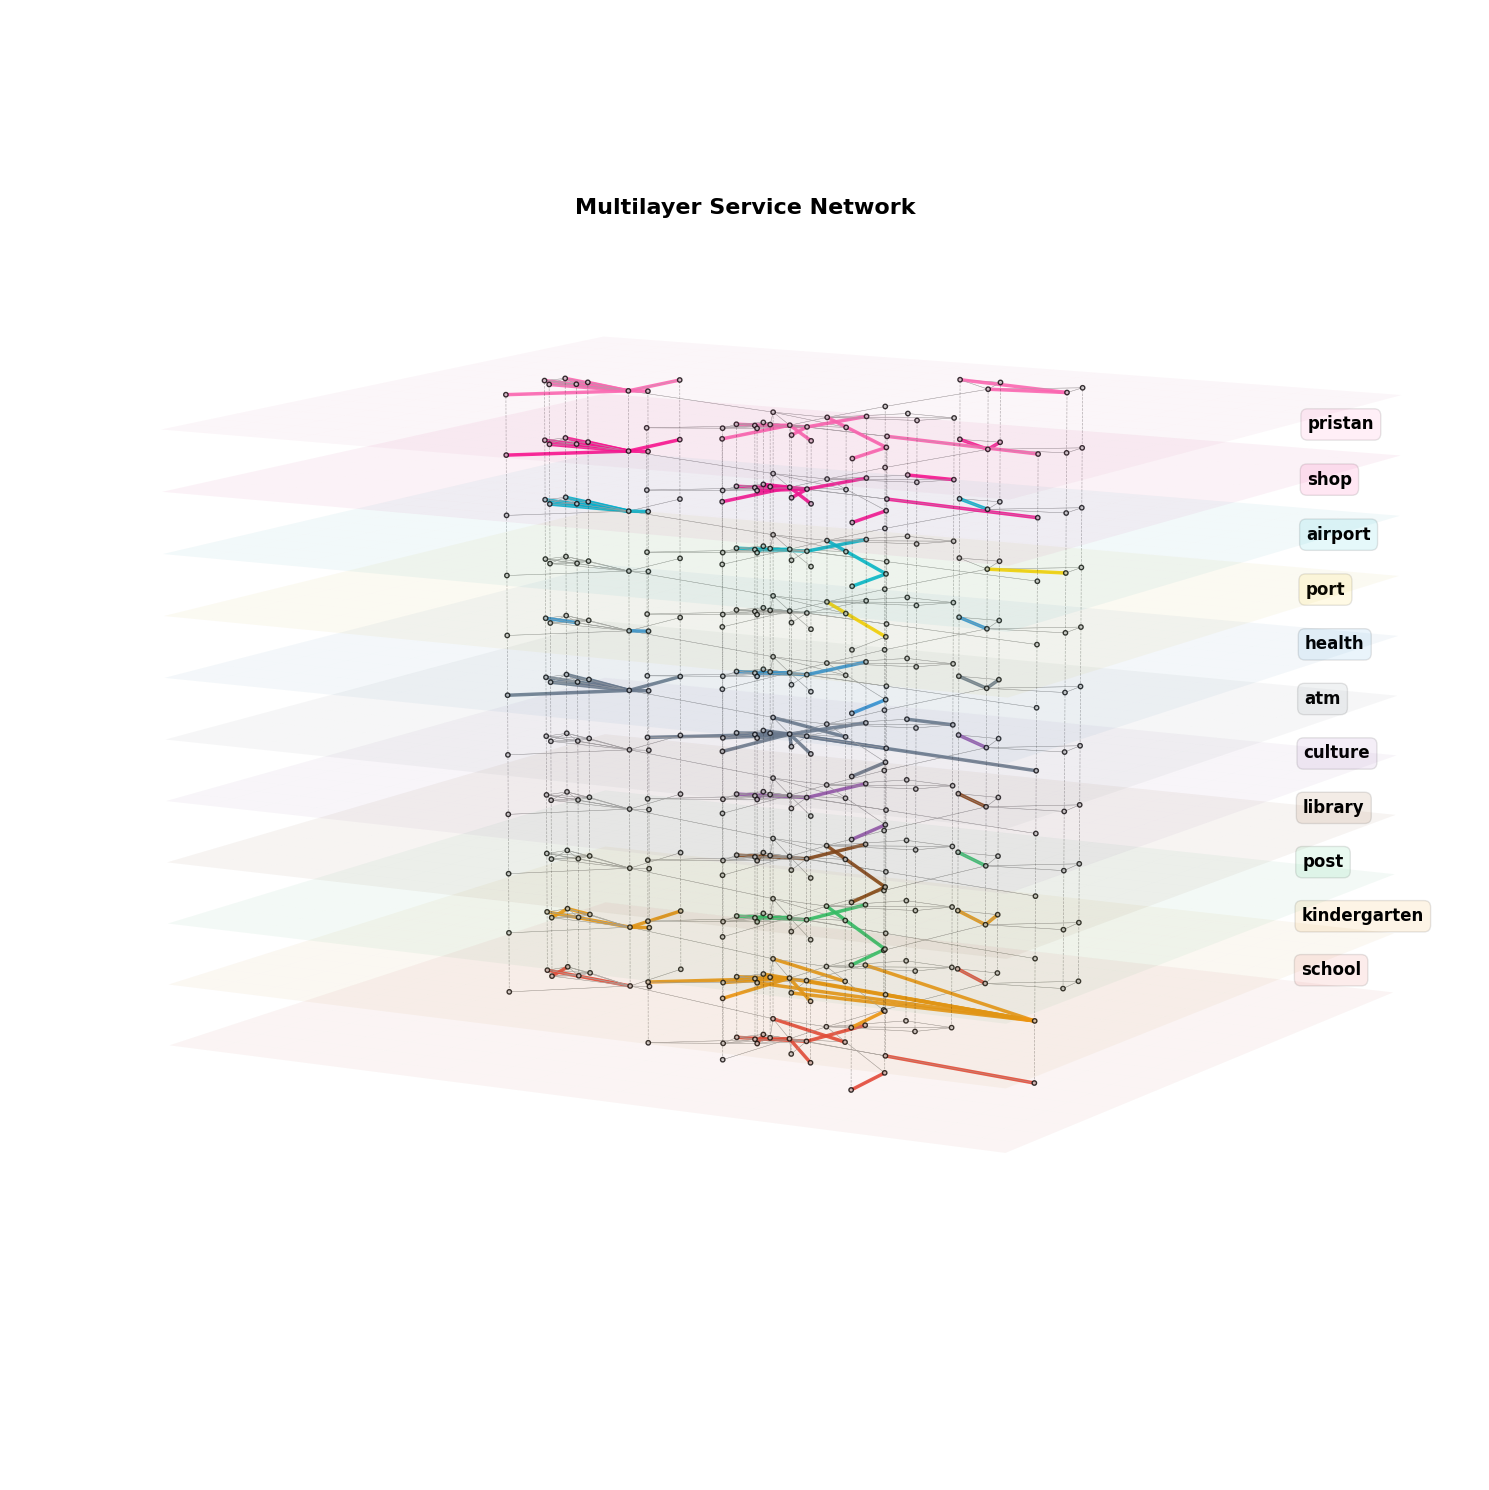

In [10]:
from plotter_multilayer_service_network import plot_multilayer_network

# Example usage:
fig = plot_multilayer_network(
    all_results, SETTL_NAME, service_list, month=5, figsize=(15, 30)
)
plt.show()


In [11]:
# pip install node2vec


In [12]:
# import numpy as np
# import igraph as ig
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import defaultdict
# import pandas as pd

# # Try to import pymnet (optional)
# try:
#     import pymnet

#     PYMNET_AVAILABLE = True
# except ImportError:
#     PYMNET_AVAILABLE = False
#     print("pymnet not available, using igraph only")


# class IGraphMultilayerAnalyzer:
#     def __init__(self, all_results, service_list, settl_name, month_indices):
#         self.all_results = all_results
#         self.service_list = service_list
#         self.settl_name = settl_name
#         self.month_indices = month_indices
#         self.igraph_networks = {}
#         self.results = {}

#     def build_igraph_networks(self):
#         """Build igraph networks filtering edges with assignment > 0"""

#         for month_idx in self.month_indices:
#             self.igraph_networks[month_idx] = {}

#             for service in self.service_list:
#                 try:
#                     graphs = self.all_results[self.settl_name][service]["stats"].graphs
#                     if month_idx < len(graphs):
#                         nx_graph = graphs[month_idx]

#                         # Filter edges with assignment > 0 only
#                         filtered_edges = []
#                         edge_weights = []

#                         for u, v, data in nx_graph.edges(data=True):
#                             assignment = data.get("assignment", 0)
#                             if assignment > 0:
#                                 filtered_edges.append((u, v))
#                                 edge_weights.append(assignment)

#                         if len(filtered_edges) > 0:
#                             # Create igraph network
#                             nodes = list(
#                                 set([n for edge in filtered_edges for n in edge])
#                             )
#                             node_map = {node: i for i, node in enumerate(nodes)}

#                             ig_edges = [
#                                 (node_map[u], node_map[v]) for u, v in filtered_edges
#                             ]

#                             g = ig.Graph()
#                             g.add_vertices(len(nodes))
#                             g.add_edges(ig_edges)

#                             # Add attributes
#                             g.vs["name"] = nodes
#                             g.es["weight"] = edge_weights
#                             g.es["assignment"] = edge_weights

#                             self.igraph_networks[month_idx][service] = g

#                             print(
#                                 f"Month {month_idx}, {service}: {len(nodes)} nodes, {len(filtered_edges)} edges (assignment > 0)"
#                             )
#                         else:
#                             print(
#                                 f"Month {month_idx}, {service}: No edges with assignment > 0"
#                             )

#                 except Exception as e:
#                     print(f"Error processing {service}, month {month_idx}: {e}")

#     def analyze_temporal_stability_igraph(self):
#         """Analyze temporal stability using igraph"""
#         stability_data = {}

#         for service in self.service_list:
#             month_stabilities = []

#             for i in range(len(self.month_indices) - 1):
#                 month1, month2 = self.month_indices[i], self.month_indices[i + 1]

#                 if (
#                     service in self.igraph_networks[month1]
#                     and service in self.igraph_networks[month2]
#                 ):

#                     g1 = self.igraph_networks[month1][service]
#                     g2 = self.igraph_networks[month2][service]

#                     # Node overlap
#                     nodes1 = set(g1.vs["name"])
#                     nodes2 = set(g2.vs["name"])

#                     if len(nodes1) > 0 and len(nodes2) > 0:
#                         node_jaccard = len(nodes1 & nodes2) / len(nodes1 | nodes2)

#                         # Edge overlap for common nodes
#                         common_nodes = nodes1 & nodes2
#                         if len(common_nodes) > 2:
#                             # Create subgraphs with common nodes only
#                             try:
#                                 common_indices1 = [
#                                     g1.vs.find(name=n).index for n in common_nodes
#                                 ]
#                                 common_indices2 = [
#                                     g2.vs.find(name=n).index for n in common_nodes
#                                 ]

#                                 subg1 = g1.induced_subgraph(common_indices1)
#                                 subg2 = g2.induced_subgraph(common_indices2)

#                                 # Edge jaccard similarity
#                                 edges1 = set(subg1.get_edgelist())
#                                 edges2 = set(subg2.get_edgelist())

#                                 if len(edges1) > 0 or len(edges2) > 0:
#                                     edge_jaccard = len(edges1 & edges2) / len(
#                                         edges1 | edges2
#                                     )
#                                 else:
#                                     edge_jaccard = 1.0  # Both empty

#                                 month_stabilities.append(
#                                     {
#                                         "transition": f"{month1}-{month2}",
#                                         "node_stability": node_jaccard,
#                                         "edge_stability": edge_jaccard,
#                                         "combined_stability": (
#                                             node_jaccard + edge_jaccard
#                                         )
#                                         / 2,
#                                         "n_common_nodes": len(common_nodes),
#                                     }
#                                 )
#                             except Exception as e:
#                                 print(
#                                     f"Error computing stability for {service} {month1}-{month2}: {e}"
#                                 )

#             if month_stabilities:
#                 stability_data[service] = month_stabilities

#         self.results["temporal_stability"] = stability_data
#         return stability_data

#     def analyze_multilayer_centrality_igraph(self):
#         """Analyze multilayer centrality using igraph"""
#         centrality_data = {}

#         for month_idx in self.month_indices:
#             centrality_data[month_idx] = {}

#             # Get all active nodes
#             all_nodes = set()
#             for service in self.service_list:
#                 if service in self.igraph_networks[month_idx]:
#                     all_nodes.update(
#                         self.igraph_networks[month_idx][service].vs["name"]
#                     )

#             # Compute centrality measures for each node
#             for node in all_nodes:
#                 betweenness_sum = 0
#                 closeness_sum = 0
#                 degree_sum = 0
#                 layer_count = 0

#                 for service in self.service_list:
#                     if service in self.igraph_networks[month_idx]:
#                         g = self.igraph_networks[month_idx][service]

#                         try:
#                             node_idx = g.vs.find(name=node).index

#                             # Betweenness centrality
#                             if g.vcount() > 2:
#                                 betweenness = g.betweenness([node_idx])[0]
#                                 betweenness_sum += betweenness

#                             # Degree centrality
#                             degree = g.degree(node_idx)
#                             degree_sum += degree

#                             # Closeness centrality (if connected)
#                             if g.vcount() > 1:
#                                 try:
#                                     closeness = g.closeness([node_idx])[0]
#                                     if not np.isnan(closeness) and np.isfinite(
#                                         closeness
#                                     ):
#                                         closeness_sum += closeness
#                                 except:
#                                     pass

#                             layer_count += 1

#                         except ValueError:
#                             # Node not in this layer
#                             continue

#                 if layer_count > 0:
#                     centrality_data[month_idx][node] = {
#                         "multilayer_betweenness": betweenness_sum / layer_count,
#                         "multilayer_closeness": (
#                             closeness_sum / layer_count if closeness_sum > 0 else 0
#                         ),
#                         "multilayer_degree": degree_sum,
#                         "layer_participation": layer_count / len(self.service_list),
#                     }

#         self.results["multilayer_centrality"] = centrality_data
#         return centrality_data

#     def analyze_temporal_motifs(self):
#         """Analyze temporal motifs in network evolution"""
#         motif_data = {}

#         for service in self.service_list:
#             # Collect node presence patterns
#             node_patterns = defaultdict(list)

#             # Get all nodes that ever appear
#             all_nodes = set()
#             for month_idx in self.month_indices:
#                 if service in self.igraph_networks[month_idx]:
#                     all_nodes.update(
#                         self.igraph_networks[month_idx][service].vs["name"]
#                     )

#             # Track presence of each node over time
#             for node in all_nodes:
#                 presence_pattern = []
#                 for month_idx in self.month_indices:
#                     if service in self.igraph_networks[month_idx]:
#                         g = self.igraph_networks[month_idx][service]
#                         present = node in g.vs["name"]
#                         presence_pattern.append(1 if present else 0)
#                     else:
#                         presence_pattern.append(0)

#                 node_patterns[tuple(presence_pattern)].append(node)

#             # Analyze edge patterns for persistent nodes
#             edge_motifs = defaultdict(int)
#             persistent_nodes = []

#             for pattern, nodes in node_patterns.items():
#                 if (
#                     sum(pattern) >= len(self.month_indices) * 0.8
#                 ):  # Present in 80%+ of months
#                     persistent_nodes.extend(nodes)

#             # For persistent nodes, track edge formation/dissolution patterns
#             if len(persistent_nodes) > 1:
#                 for i, node1 in enumerate(
#                     persistent_nodes[:10]
#                 ):  # Limit for performance
#                     for node2 in persistent_nodes[i + 1 : 11]:
#                         edge_pattern = []
#                         for month_idx in self.month_indices:
#                             if service in self.igraph_networks[month_idx]:
#                                 g = self.igraph_networks[month_idx][service]
#                                 try:
#                                     idx1 = g.vs.find(name=node1).index
#                                     idx2 = g.vs.find(name=node2).index
#                                     edge_exists = g.are_connected(idx1, idx2)
#                                     edge_pattern.append(1 if edge_exists else 0)
#                                 except:
#                                     edge_pattern.append(0)
#                             else:
#                                 edge_pattern.append(0)

#                         edge_motifs[tuple(edge_pattern)] += 1

#             motif_data[service] = {
#                 # "node_presence_patterns": dict(node_patterns),
#                 "edge_formation_motifs": dict(edge_motifs),
#                 "persistent_nodes": persistent_nodes,
#                 "pattern_diversity": len(node_patterns),
#             }

#         self.results["temporal_motifs"] = motif_data
#         return motif_data

#     def analyze_multilayer_temporal_coupling(self):
#         """Analyze temporal coupling between service layers"""
#         coupling_data = {}

#         # For each pair of services, analyze temporal synchronization
#         for i, service1 in enumerate(self.service_list):
#             for j, service2 in enumerate(self.service_list[i + 1 :], i + 1):
#                 pair_name = f"{service1}-{service2}"

#                 # Collect time series of network features
#                 features1 = []
#                 features2 = []

#                 for month_idx in self.month_indices:
#                     # Service 1 features
#                     if service1 in self.igraph_networks[month_idx]:
#                         g1 = self.igraph_networks[month_idx][service1]
#                         f1 = [
#                             g1.vcount(),
#                             g1.ecount(),
#                             g1.density() if g1.vcount() > 1 else 0,
#                         ]
#                     else:
#                         f1 = [0, 0, 0]

#                     # Service 2 features
#                     if service2 in self.igraph_networks[month_idx]:
#                         g2 = self.igraph_networks[month_idx][service2]
#                         f2 = [
#                             g2.vcount(),
#                             g2.ecount(),
#                             g2.density() if g2.vcount() > 1 else 0,
#                         ]
#                     else:
#                         f2 = [0, 0, 0]

#                     features1.append(f1)
#                     features2.append(f2)

#                 features1 = np.array(features1)
#                 features2 = np.array(features2)

#                 # Calculate temporal correlations
#                 correlations = []
#                 feature_names = ["node_count", "edge_count", "density"]

#                 for k in range(features1.shape[1]):
#                     if np.var(features1[:, k]) > 0 and np.var(features2[:, k]) > 0:
#                         corr = np.corrcoef(features1[:, k], features2[:, k])[0, 1]
#                         if not np.isnan(corr):
#                             correlations.append(
#                                 {"feature": feature_names[k], "correlation": corr}
#                             )

#                 # Calculate lead-lag relationships
#                 lead_lag_correlations = []
#                 for lag in range(1, min(3, len(features1))):
#                     if len(features1) > lag:
#                         for k in range(features1.shape[1]):
#                             # Service1 leads Service2
#                             if (
#                                 np.var(features1[:-lag, k]) > 0
#                                 and np.var(features2[lag:, k]) > 0
#                             ):
#                                 corr_lead = np.corrcoef(
#                                     features1[:-lag, k], features2[lag:, k]
#                                 )[0, 1]
#                                 if not np.isnan(corr_lead):
#                                     lead_lag_correlations.append(
#                                         {
#                                             "lag": lag,
#                                             "leader": service1,
#                                             "follower": service2,
#                                             "feature": feature_names[k],
#                                             "correlation": corr_lead,
#                                         }
#                                     )

#                             # Service2 leads Service1
#                             if (
#                                 np.var(features2[:-lag, k]) > 0
#                                 and np.var(features1[lag:, k]) > 0
#                             ):
#                                 corr_lag = np.corrcoef(
#                                     features2[:-lag, k], features1[lag:, k]
#                                 )[0, 1]
#                                 if not np.isnan(corr_lag):
#                                     lead_lag_correlations.append(
#                                         {
#                                             "lag": lag,
#                                             "leader": service2,
#                                             "follower": service1,
#                                             "feature": feature_names[k],
#                                             "correlation": corr_lag,
#                                         }
#                                     )

#                 coupling_data[pair_name] = {
#                     "temporal_correlations": correlations,
#                     "lead_lag_relationships": lead_lag_correlations,
#                 }

#         self.results["multilayer_temporal_coupling"] = coupling_data
#         return coupling_data

#     def run_complete_analysis(self):
#         """Run complete igraph-based multilayer temporal analysis"""
#         print("Running Advanced igraph-based Multilayer Temporal Analysis...")
#         print("=" * 70)

#         print("1. Building filtered igraph networks (assignment > 0)...")
#         self.build_igraph_networks()

#         print("4. Computing temporal stability...")
#         self.analyze_temporal_stability_igraph()

#         print("5. Computing multilayer centrality...")
#         self.analyze_multilayer_centrality_igraph()

#         print("8. Analyzing temporal motifs...")
#         self.analyze_temporal_motifs()

#         print("9. Analyzing multilayer temporal coupling...")
#         self.analyze_multilayer_temporal_coupling()

#         return self.results

#     def visualize_temporal_coupling_only(self, save_path=None):
#         """Visualize temporal coupling analysis results in publication-quality figure"""
#         # Set up professional plotting parameters
#         # plt.style.use('seaborn')  # Using default seaborn style
#         plt.rcParams.update(
#             {
#                 "font.family": "serif",
#                 "font.serif": ["Times New Roman"],  # Common for publications
#                 "font.size": 12,
#                 "axes.labelsize": 14,
#                 "axes.titlesize": 16,
#                 "xtick.labelsize": 12,
#                 "ytick.labelsize": 12,
#                 "legend.fontsize": 10,
#                 "figure.dpi": 300,
#                 "savefig.dpi": 300,
#                 "savefig.format": "pdf",  # Preferred for publications
#                 "grid.linewidth": 0.5,
#                 "grid.alpha": 0.3,
#             }
#         )

#         # Create figure with constrained layout
#         fig, axes = plt.subplots(
#             1, 4, figsize=(24, 6), gridspec_kw={"width_ratios": [1.2, 1, 1, 1]}
#         )
#         fig.suptitle("Temporal Coupling Analysis", fontsize=18, fontweight="bold")
#         plt.subplots_adjust(top=0.88, wspace=0.3)

#         # Create consistent color palette
#         color_palette = plt.cm.tab10(np.linspace(0, 1, len(self.service_list)))
#         service_colors = {
#             svc: color_palette[i] for i, svc in enumerate(self.service_list)
#         }

#         # ========== 1. Network Size Evolution ==========
#         network_sizes = {service: [] for service in self.service_list}
#         for month_idx in self.month_indices:
#             for service in self.service_list:
#                 if service in self.igraph_networks.get(month_idx, {}):
#                     network_sizes[service].append(
#                         self.igraph_networks[month_idx][service].vcount()
#                     )
#                 else:
#                     network_sizes[service].append(0)

#         for service in self.service_list:
#             if any(size > 0 for size in network_sizes[service]):
#                 axes[0].plot(
#                     self.month_indices,
#                     network_sizes[service],
#                     "o--" if len(self.month_indices) < 12 else "-",
#                     lw=1.5,
#                     markersize=6,
#                     color=service_colors[service],
#                     label=service,
#                     alpha=0.9,
#                 )

#         axes[0].set_xlabel("Time (Months)", fontweight="bold")
#         axes[0].set_ylabel("Number of Nodes", fontweight="bold")
#         axes[0].set_title("A. Network Size Evolution", loc="left", fontweight="bold")
#         axes[0].legend(fontsize=10, ncol=2 if len(self.service_list) > 5 else 1)
#         axes[0].grid(True, linestyle=":", alpha=0.7)
#         axes[0].tick_params(axis="x", rotation=45 if len(self.month_indices) > 6 else 0)

#         # ========== 2. Layer Stability ==========
#         if "temporal_stability" in self.results:
#             stability_data = []
#             for service, stabilities in self.results["temporal_stability"].items():
#                 if stabilities:
#                     edge_stabilities = [s["edge_stability"] for s in stabilities]
#                     stability_data.append(
#                         {
#                             "service": service,
#                             "edge": np.mean(edge_stabilities),
#                             "std": np.std(edge_stabilities),
#                         }
#                     )

#             if stability_data:
#                 df = pd.DataFrame(stability_data)
#                 x = np.arange(len(df))
#                 axes[1].bar(
#                     x,
#                     df["edge"],
#                     width=0.7,
#                     color=[service_colors[s] for s in df["service"]],
#                     edgecolor="k",
#                     linewidth=0.5,
#                     yerr=df["std"],
#                     error_kw={"elinewidth": 1.5, "capthick": 1.5},
#                 )

#                 # Add data labels
#                 for i, val in enumerate(df["edge"]):
#                     axes[1].text(
#                         i,
#                         val + 0.02,
#                         f"{val:.2f}",
#                         ha="center",
#                         va="bottom",
#                         fontsize=10,
#                     )

#                 axes[1].set_ylabel("Stability Score", fontweight="bold")
#                 axes[1].set_title("B. Layer Stability", loc="left", fontweight="bold")
#                 axes[1].set_xticks(x)
#                 axes[1].set_xticklabels(df["service"], rotation=45, ha="right")
#                 axes[1].set_ylim(0, min(1.1, max(df["edge"]) * 1.2))
#                 axes[1].grid(True, axis="y", linestyle=":", alpha=0.7)

#         # ========== 3. Temporal Coupling Matrix ==========
#         if "multilayer_temporal_coupling" in self.results:
#             n_services = len(self.service_list)
#             coupling_matrix = np.zeros((n_services, n_services))

#             for pair, data in self.results["multilayer_temporal_coupling"].items():
#                 if not data["temporal_correlations"]:
#                     continue

#                 service1, service2 = pair.split("-")
#                 if service1 in self.service_list and service2 in self.service_list:
#                     i, j = self.service_list.index(service1), self.service_list.index(
#                         service2
#                     )
#                     mean_corr = np.mean(
#                         [c["correlation"] for c in data["temporal_correlations"]]
#                     )
#                     coupling_matrix[i, j] = mean_corr
#                     coupling_matrix[j, i] = mean_corr

#             # Create annotated heatmap
#             sns.heatmap(
#                 coupling_matrix,
#                 ax=axes[2],
#                 cmap="coolwarm",
#                 center=0,
#                 vmin=-1,
#                 vmax=1,
#                 annot=True,
#                 fmt=".2f",
#                 annot_kws={"size": 10},
#                 linewidths=0.5,
#                 linecolor="gray",
#                 xticklabels=self.service_list,
#                 yticklabels=self.service_list,
#                 cbar_kws={"label": "Correlation Coefficient", "shrink": 0.75},
#             )
#             axes[2].set_title(
#                 "C. Temporal Coupling Matrix", loc="left", fontweight="bold"
#             )
#             axes[2].tick_params(axis="x", rotation=45, labelsize=10)
#             axes[2].tick_params(axis="y", rotation=0, labelsize=10)
#             axes[2].set_xlabel("")
#             axes[2].set_ylabel("")

#         # ========== 4. Lead-Lag Relationships ==========
#         if "multilayer_temporal_coupling" in self.results:
#             lead_lag_matrix = np.zeros((len(self.service_list), len(self.service_list)))

#             for pair, data in self.results["multilayer_temporal_coupling"].items():
#                 for relation in data.get("lead_lag_relationships", []):
#                     if relation["correlation"] > 0.5:
#                         leader_idx = self.service_list.index(relation["leader"])
#                         follower_idx = self.service_list.index(relation["follower"])
#                         lead_lag_matrix[
#                             leader_idx, follower_idx
#                         ] += 1  # Count occurrences

#             # Normalize by max value for better color scaling
#             max_val = lead_lag_matrix.max() if lead_lag_matrix.max() > 0 else 1
#             norm_matrix = lead_lag_matrix / max_val

#             # Create annotated heatmap with directional indicator
#             sns.heatmap(
#                 norm_matrix,
#                 ax=axes[3],
#                 cmap="Blues",
#                 vmin=0,
#                 vmax=1,
#                 annot=lead_lag_matrix.astype(int),  # Show raw counts
#                 fmt="d",
#                 annot_kws={"size": 10},
#                 linewidths=0.5,
#                 linecolor="gray",
#                 xticklabels=self.service_list,
#                 yticklabels=self.service_list,
#                 cbar_kws={"label": "Normalized Influence", "shrink": 0.75},
#             )
#             axes[3].set_title(
#                 "D. Lead-Lag Relationships", loc="left", fontweight="bold"
#             )
#             axes[3].tick_params(axis="x", rotation=45, labelsize=10)
#             axes[3].tick_params(axis="y", rotation=0, labelsize=10)
#             axes[3].set_xlabel("Follower", fontweight="bold")
#             axes[3].set_ylabel("Leader", fontweight="bold")

#             # Add directional arrow for clarity
#             axes[3].annotate(
#                 "",
#                 xy=(0.05, 0.95),
#                 xytext=(0.05, 0.05),
#                 xycoords="axes fraction",
#                 arrowprops=dict(arrowstyle="->", color="red", lw=2),
#             )

#         # Final adjustments
#         if save_path:
#             plt.savefig(save_path, bbox_inches="tight", dpi=300)
#             print(f"Saved visualization to {save_path}")
#         else:
#             plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for suptitle
#             plt.show()


# def analyze_with_igraph_and_pymnet(
#     all_results, service_list, settl_name, month_start=4, end_month=10
# ):
#     """Main function for igraph/pymnet based multilayer temporal analysis"""
#     month_indices = list(range(month_start, end_month))
#     analyzer = IGraphMultilayerAnalyzer(
#         all_results, service_list, settl_name, month_indices
#     )

#     results = analyzer.run_complete_analysis()

#     # Print summary statistics
#     print("\nSummary:")
#     print("=" * 30)

#     if "multilayer_participation" in results and results["multilayer_participation"]:
#         all_participations = []
#         for month_data in results["multilayer_participation"].values():
#             for node_data in month_data.values():
#                 all_participations.append(node_data["participation"])

#         if all_participations:
#             print(
#                 f"Participation coefficient: {np.mean(all_participations):.3f} ± {np.std(all_participations):.3f}"
#             )
#             print(
#                 f"Range: [{np.min(all_participations):.3f}, {np.max(all_participations):.3f}]"
#             )

#     if "temporal_stability" in results and results["temporal_stability"]:
#         all_stabilities = []
#         for service_data in results["temporal_stability"].values():
#             for stability_data in service_data:
#                 all_stabilities.append(stability_data["combined_stability"])

#         if all_stabilities:
#             print(
#                 f"Temporal stability: {np.mean(all_stabilities):.3f} ± {np.std(all_stabilities):.3f}"
#             )

#     return analyzer, results


# # Usage:
# analyzer, results = analyze_with_igraph_and_pymnet(
#     all_results, service_list, SETTL_NAME
# )


In [13]:
# analyzer.visualize_temporal_coupling_only()


In [14]:
from plotter_flow_sankey import create_clean_sankey

# Usage:
# Usage example:
for service in service_list:
    try:
        month_start = 4
        end_month = 10
        graphs = all_results[SETTL_NAME][service]["stats"].graphs[month_start:end_month]
        fig = create_clean_sankey(graphs, service_name=service, month_start=month_start)
    except Exception as ex:
        print(ex)


Creating Sankey for 6 time periods...
Excluding 27 self-sufficient settlements: ['Volochanka', 'Ratta', 'Syndassko', 'Kresty', "Ust'-Port", 'Hatanga', 'Antipajuta', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Heta', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Katyryk', 'Tarko-Sale', 'Novorybnaja', 'Potapovo', 'Dikson', 'Dudinka', 'Popigaj', "Tol'ka", 'Gyda', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 11 consumers
T1: 8 assignments, 3 no provider
T2: 11 assignments, 0 no provider
T3: 11 assignments, 0 no provider
T4: 11 assignments, 0 no provider
T5: 11 assignments, 0 no provider
T6: 8 assignments, 3 no provider
Created 63 nodes
Created 66 flows


Creating Sankey for 6 time periods...
Excluding 17 self-sufficient settlements: ['Nahodka', 'Hatanga', "Noril'sk", 'Dikson', 'Dudinka', 'Antipajuta', "Krasnosel'kup", 'Novyj Urengoj', 'Tazovskij', "Tol'ka", 'Gyda', 'Katyryk', 'Kresty', 'Tarko-Sale', 'Vorontsovo', 'Novorybnaja', 'Gaz-Sale']
Found 21 consumers
T1: 18 assignments, 3 no provider
T2: 21 assignments, 0 no provider
T3: 21 assignments, 0 no provider
T4: 21 assignments, 0 no provider
T5: 21 assignments, 0 no provider
T6: 18 assignments, 3 no provider
Created 63 nodes
Created 126 flows


Creating Sankey for 6 time periods...
Excluding 32 self-sufficient settlements: ["Ust'-Avam", 'Volochanka', 'Ratta', 'Syndassko', 'Kresty', 'Novaja', "Ust'-Port", 'Hatanga', 'Antipajuta', 'Zhdaniha', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Heta', 'Bajkalovsk', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Katyryk', 'Tarko-Sale', 'Tuhard', 'Novorybnaja', 'Potapovo', 'Dikson', 'Dudinka', 'Popigaj', "Tol'ka", 'Gyda', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 6 consumers
T1: 3 assignments, 3 no provider
T2: 6 assignments, 0 no provider
T3: 6 assignments, 0 no provider
T4: 6 assignments, 0 no provider
T5: 6 assignments, 0 no provider
T6: 3 assignments, 3 no provider
Created 34 nodes
Created 36 flows


Creating Sankey for 6 time periods...
Excluding 33 self-sufficient settlements: ["Ust'-Avam", 'Volochanka', 'Levinskie Peski', 'Ratta', 'Syndassko', 'Kresty', 'Novaja', "Ust'-Port", 'Hatanga', 'Antipajuta', 'Zhdaniha', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Heta', 'Bajkalovsk', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Katyryk', 'Tarko-Sale', 'Tuhard', 'Novorybnaja', 'Potapovo', 'Dikson', 'Dudinka', 'Popigaj', "Tol'ka", 'Gyda', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 5 consumers
T1: 3 assignments, 2 no provider
T2: 5 assignments, 0 no provider
T3: 5 assignments, 0 no provider
T4: 5 assignments, 0 no provider
T5: 5 assignments, 0 no provider
T6: 3 assignments, 2 no provider
Created 29 nodes
Created 30 flows


Creating Sankey for 6 time periods...
Excluding 33 self-sufficient settlements: ["Ust'-Avam", 'Volochanka', 'Levinskie Peski', 'Ratta', 'Syndassko', 'Kresty', 'Novaja', "Ust'-Port", 'Hatanga', 'Antipajuta', 'Zhdaniha', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Heta', 'Bajkalovsk', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Katyryk', 'Tarko-Sale', 'Tuhard', 'Novorybnaja', 'Potapovo', 'Dikson', 'Dudinka', 'Popigaj', "Tol'ka", 'Gyda', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 5 consumers
T1: 3 assignments, 2 no provider
T2: 5 assignments, 0 no provider
T3: 5 assignments, 0 no provider
T4: 5 assignments, 0 no provider
T5: 5 assignments, 0 no provider
T6: 3 assignments, 2 no provider
Created 29 nodes
Created 30 flows


Creating Sankey for 6 time periods...
Excluding 12 self-sufficient settlements: ['Hatanga', "Noril'sk", 'Dikson', 'Dudinka', 'Antipajuta', "Krasnosel'kup", 'Novyj Urengoj', 'Tazovskij', "Tol'ka", 'Gyda', 'Tarko-Sale', 'Gaz-Sale']
Found 26 consumers
T1: 23 assignments, 3 no provider
T2: 26 assignments, 0 no provider
T3: 26 assignments, 0 no provider
T4: 26 assignments, 0 no provider
T5: 26 assignments, 0 no provider
T6: 23 assignments, 3 no provider
Created 62 nodes
Created 156 flows


Creating Sankey for 6 time periods...
Excluding 30 self-sufficient settlements: ["Ust'-Avam", 'Volochanka', 'Ratta', 'Kresty', 'Novaja', "Ust'-Port", 'Hatanga', 'Antipajuta', 'Zhdaniha', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Heta', 'Bajkalovsk', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Katyryk', 'Tarko-Sale', 'Tuhard', 'Potapovo', 'Dikson', 'Dudinka', 'Popigaj', "Tol'ka", 'Gyda', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 8 consumers
T1: 5 assignments, 3 no provider
T2: 8 assignments, 0 no provider
T3: 8 assignments, 0 no provider
T4: 8 assignments, 0 no provider
T5: 8 assignments, 0 no provider
T6: 5 assignments, 3 no provider
Created 48 nodes
Created 48 flows


Creating Sankey for 6 time periods...
Excluding 37 self-sufficient settlements: ["Ust'-Avam", 'Volochanka', 'Levinskie Peski', 'Kikkiakki', 'Ratta', 'Syndassko', 'Kresty', 'Novaja', "Ust'-Port", 'Hatanga', 'Antipajuta', 'Zhdaniha', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Heta', 'Bajkalovsk', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Katyryk', 'Tibej-Sale', 'Tarko-Sale', 'Kazantsevo', 'Tuhard', 'Novorybnaja', 'Potapovo', 'Munguj', 'Dikson', 'Dudinka', 'Popigaj', 'Gyda', 'Polikarpovsk', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 1 consumers
T1: 1 assignments, 0 no provider
T2: 1 assignments, 0 no provider
T3: 1 assignments, 0 no provider
T4: 1 assignments, 0 no provider
T5: 1 assignments, 0 no provider
T6: 1 assignments, 0 no provider
Created 7 nodes
Created 6 flows


Creating Sankey for 6 time periods...
Excluding 26 self-sufficient settlements: ["Ust'-Avam", 'Volochanka', 'Ratta', "Ust'-Port", 'Hatanga', 'Antipajuta', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Bajkalovsk', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Katyryk', 'Tarko-Sale', 'Tuhard', 'Potapovo', 'Dikson', 'Dudinka', 'Popigaj', "Tol'ka", 'Gyda', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 12 consumers
T1: 9 assignments, 3 no provider
T2: 12 assignments, 0 no provider
T3: 12 assignments, 0 no provider
T4: 12 assignments, 0 no provider
T5: 12 assignments, 0 no provider
T6: 9 assignments, 3 no provider
Created 46 nodes
Created 72 flows


Creating Sankey for 6 time periods...
Excluding 17 self-sufficient settlements: ['Hatanga', "Noril'sk", 'Dikson', 'Dudinka', 'Antipajuta', "Krasnosel'kup", 'Novyj Urengoj', 'Tazovskij', "Tol'ka", 'Hantajskoe Ozero', 'Gyda', 'Karaul', 'Tarko-Sale', 'Vorontsovo', 'Tuhard', 'Gaz-Sale', 'Potapovo']
Found 21 consumers
T1: 18 assignments, 3 no provider
T2: 21 assignments, 0 no provider
T3: 21 assignments, 0 no provider
T4: 21 assignments, 0 no provider
T5: 21 assignments, 0 no provider
T6: 18 assignments, 3 no provider
Created 65 nodes
Created 126 flows


Creating Sankey for 6 time periods...
Excluding 21 self-sufficient settlements: ['Ratta', 'Hatanga', 'Antipajuta', 'Tazovskij', 'Hantajskoe Ozero', 'Karaul', 'Nosok', 'Nahodka', "Noril'sk", "Krasnosel'kup", 'Tarko-Sale', 'Tuhard', 'Potapovo', 'Munguj', 'Dikson', 'Dudinka', 'Popigaj', 'Gyda', 'Novyj Urengoj', 'Vorontsovo', 'Gaz-Sale']
Found 17 consumers
T1: 14 assignments, 3 no provider
T2: 17 assignments, 0 no provider
T3: 17 assignments, 0 no provider
T4: 17 assignments, 0 no provider
T5: 17 assignments, 0 no provider
T6: 14 assignments, 3 no provider
Created 55 nodes
Created 102 flows


In [15]:
from plotter_circular_network_sankey_style import plot_circular_network_sankey_style

for service in service_list:
    print(service)
    graphs = all_results[SETTL_NAME][service]["stats"].graphs[month_start:end_month]
    for i, g in enumerate(graphs):
        fig = plot_circular_network_sankey_style(
            g,
            service_name=service,
        )
        fig.show()
    print("=" * 10)


school


kindergarten


post


library


culture


atm


health


port


airport


shop


pristan


In [16]:
# Global parameters - set these once
# SERVICE_LIST = service_list
# SETTL_NAME = "yakut_chuk"
MONTH_RANGE = range(4, 10)  # May to October (indices 4-9)


In [17]:
%load_ext autoreload


In [18]:
%autoreload 3


In [19]:
from plotter_multi_temporal_nx_plots import (
    run_complete_temporal_analysis,
    # quick_single_month_analysis,
    plot_stable_communities,
    quick_stability_check,
    compare_months,
)


🔄 Running analysis: yanao_kras
   Services: 11 | Months: May-Oct

📅 Temporal evolution...


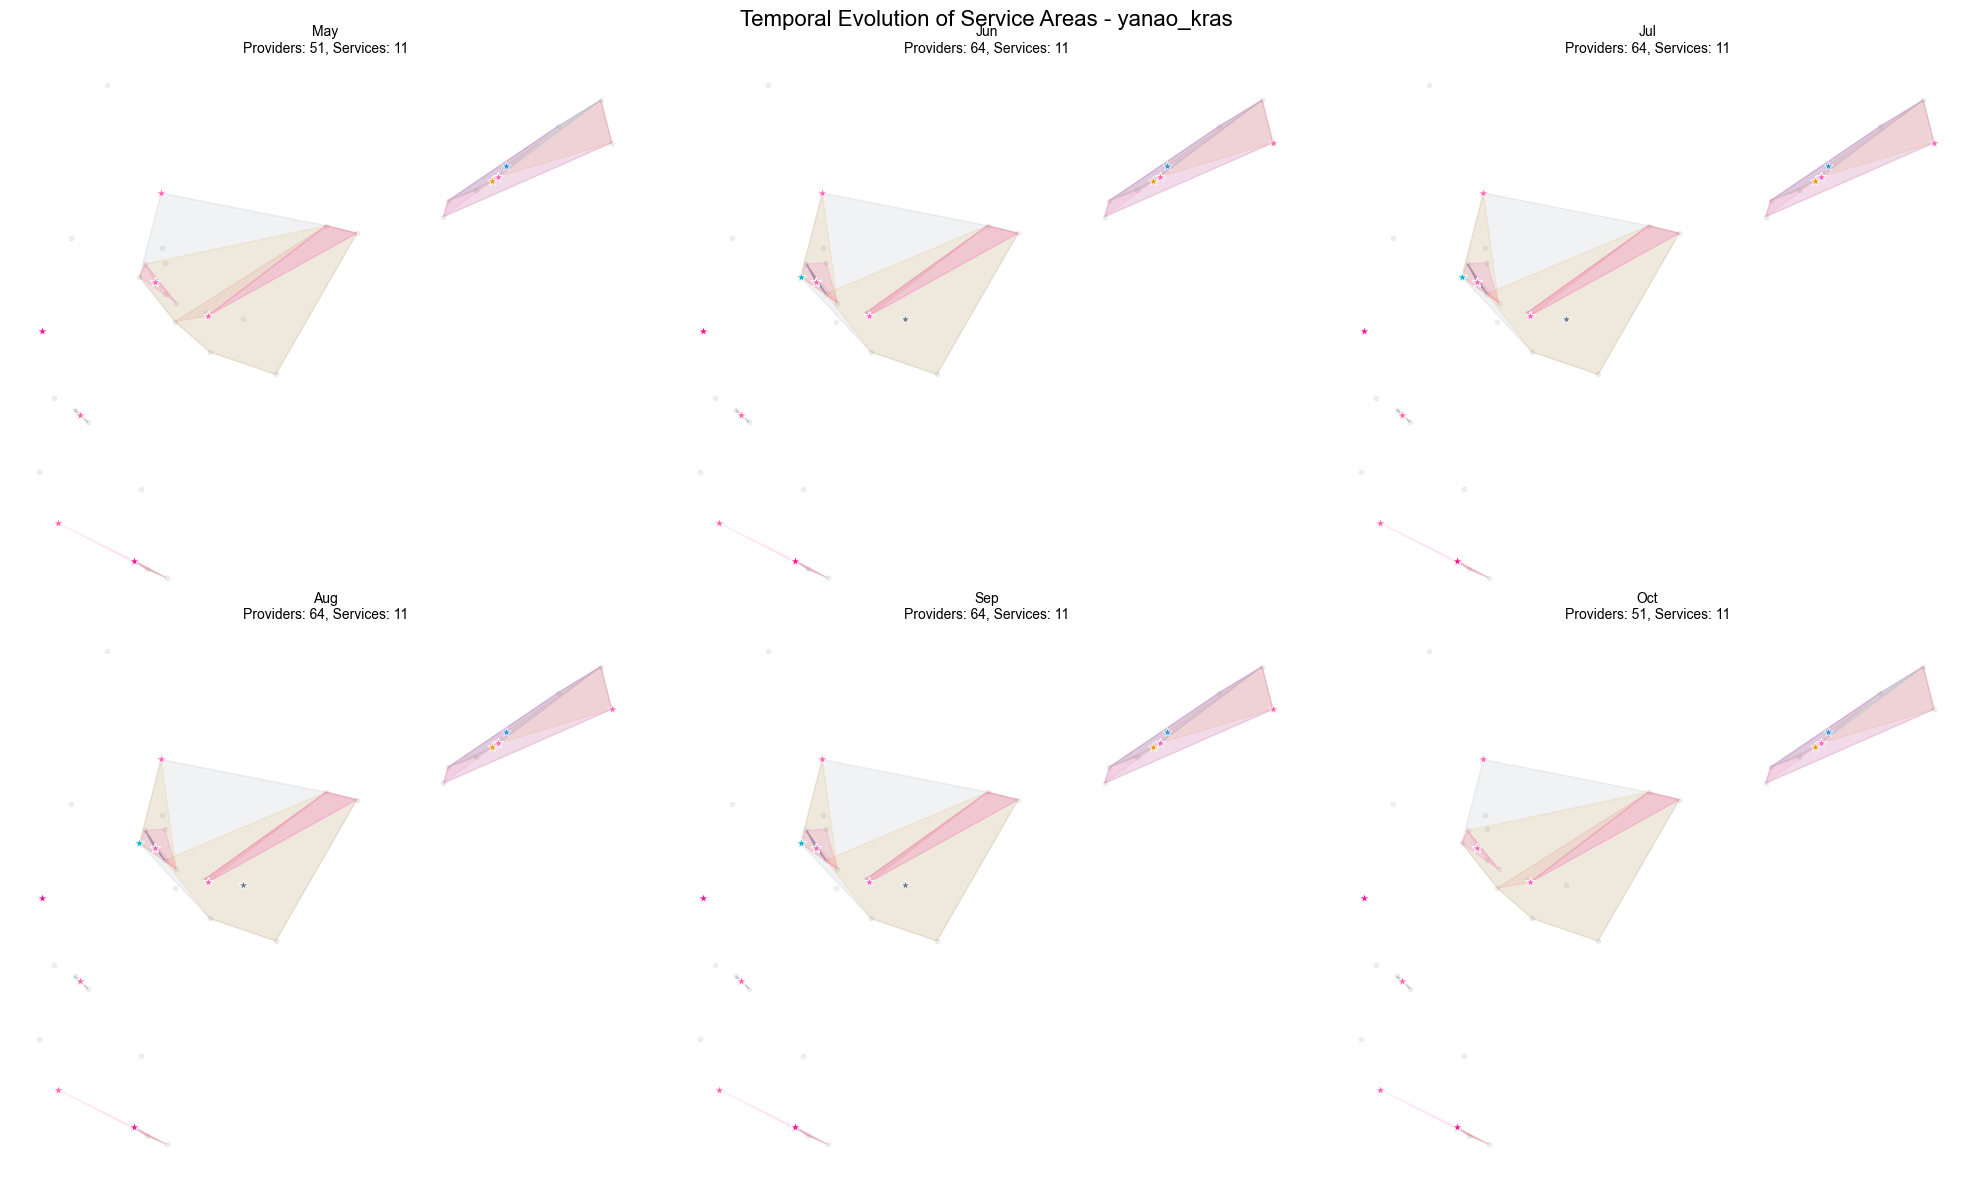


🏛️ Stable communities...


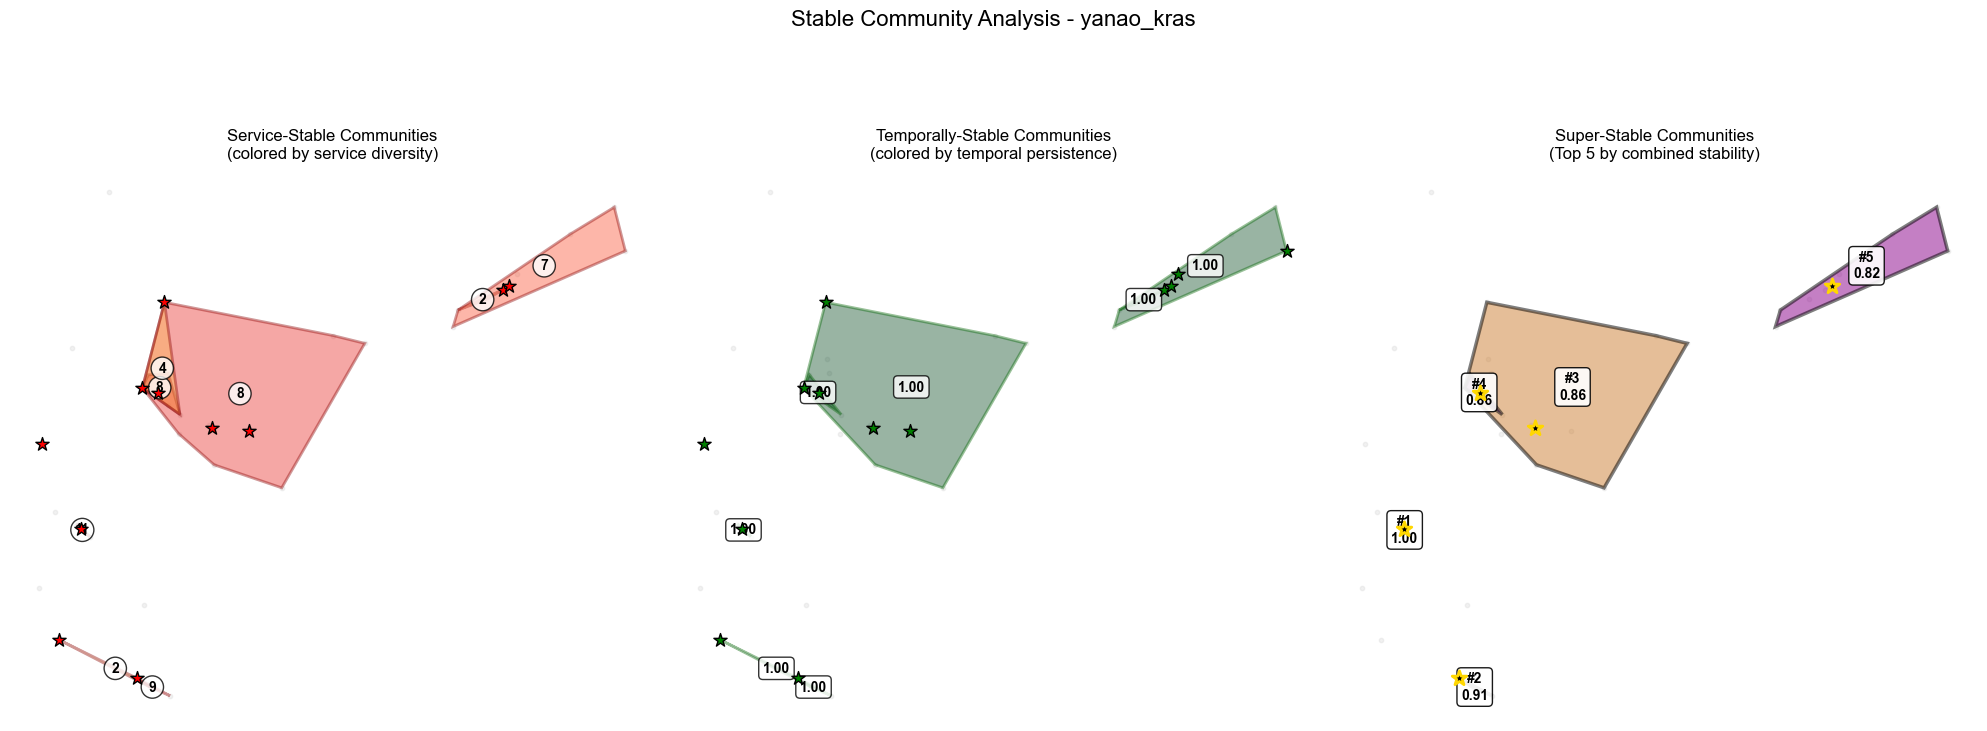

   Multi-service: 11 | Temporal: 13 | Super: 11
   #1 Gaz-Sale: 11 services, score=1.00
   #2 Tol'ka: 9 services, score=0.91
   #3 Dudinka: 8 services, score=0.86

📊 Temporal metrics...


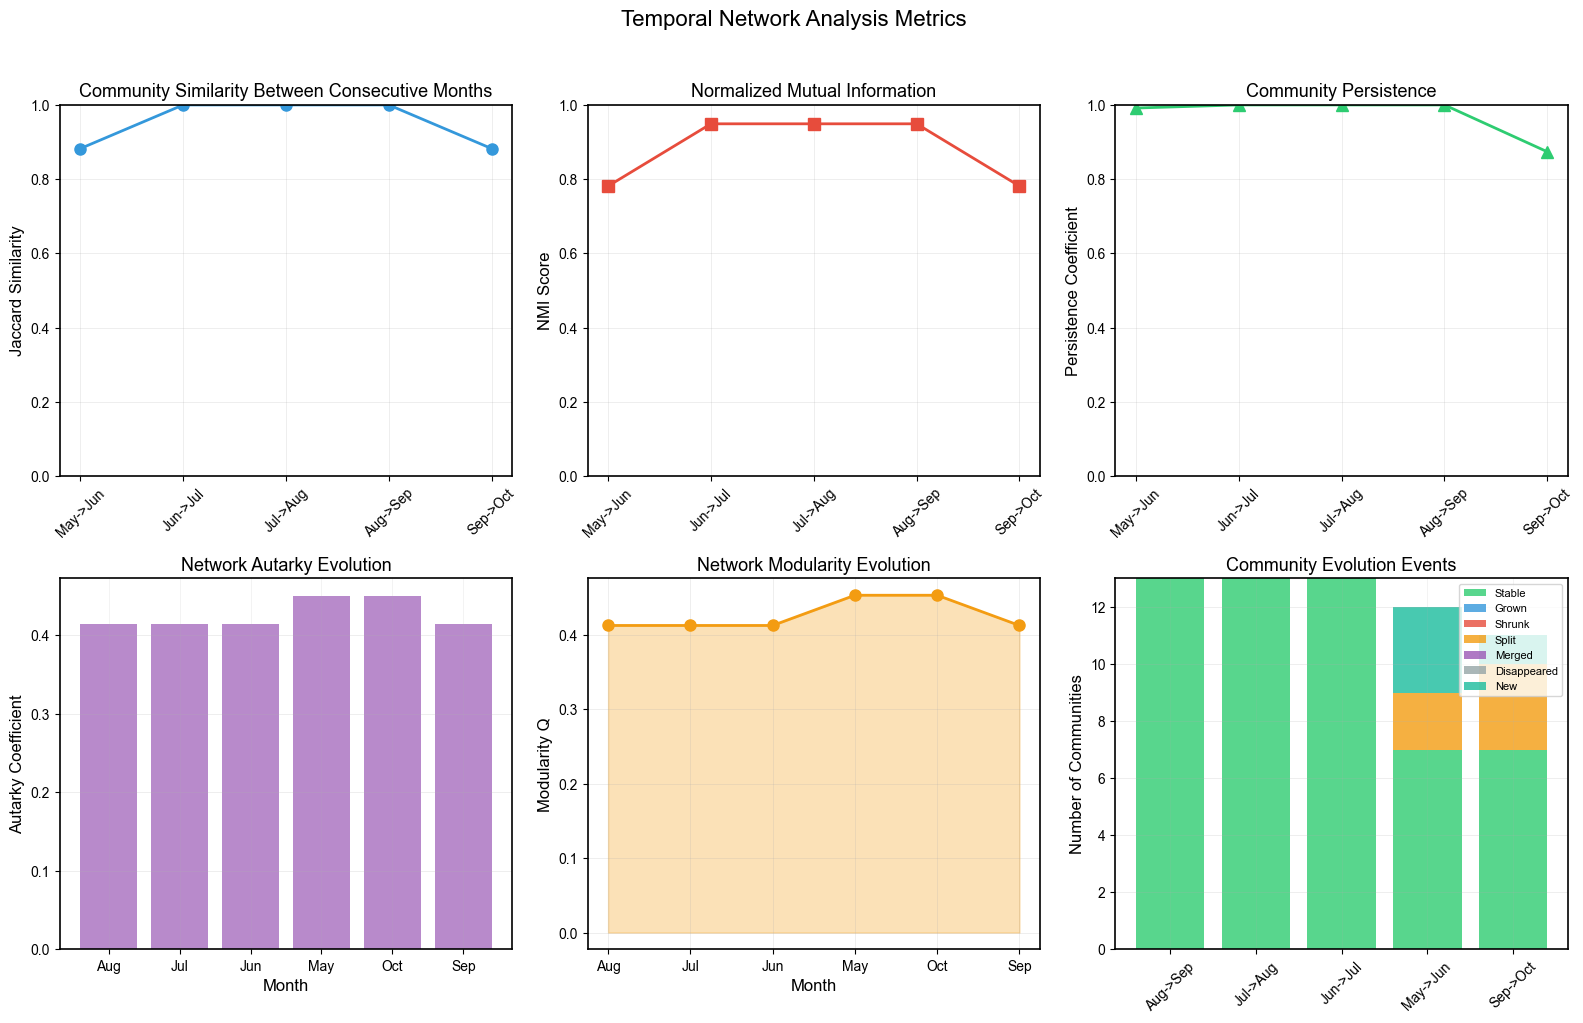

TEMPORAL MULTILAYER NETWORK ANALYSIS REPORT

📊 TEMPORAL STABILITY METRICS:
   Average Jaccard Similarity: 0.953
   Interpretation: High temporal stability
   Average NMI Score: 0.882
   Average Persistence: 0.973

🔄 SELF-SUFFICIENCY EVOLUTION:
   Autarky trend: decreasing
   Initial: 0.450, Final: 0.450

🌐 COMMUNITY DYNAMICS:
   Stable communities: 53
   Growing communities: 0
   Shrinking communities: 0
   Split events: 5
   Merge events: 0
   New communities: 4
   Disappeared: 0

🔍 KEY FINDINGS:
   ✓ Strong temporal persistence of service communities
   ⚠ Declining self-sufficiency requires attention


🔄 Jun vs Sep:
   Providers: 13 → 13
   Coverage: 34 → 34 nodes
   Similarity: 100.00%


In [20]:
results = run_complete_temporal_analysis(all_results, SETTL_NAME, MONTH_RANGE)
# pmap, provs = quick_single_month_analysis(results, SETTL_NAME, 5)
jacc, c1, c2 = compare_months(all_results, SETTL_NAME, 5, 8)


In [21]:
"""
Гистограммы распределения времени по ребрам
 + относительно норматива по времени (для сервиса)
"""


'\nГистограммы распределения времени по ребрам\n + относительно норматива по времени (для сервиса)\n'

In [22]:
"""
Хочется (однозначно) понять
как пропадают линки от температуры
Всм не картой сети а графиком
Где скажем есть какая-то температура например для ноды (в течение года(?))
И на ней же отмечено когда существует тип транспорта (или любой, или для этой ноды)
"""


'\nХочется (однозначно) понять\nкак пропадают линки от температуры\nВсм не картой сети а графиком\nГде скажем есть какая-то температура например для ноды (в течение года(?))\nИ на ней же отмечено когда существует тип транспорта (или любой, или для этой ноды)\n'

In [23]:
"""
Хочется показать (при рассм одного сервиса)
Какие линки появляются *иногда* в зависимости от изменения температуры
Или наоборот исчезают (?)
"""


'\nХочется показать (при рассм одного сервиса)\nКакие линки появляются *иногда* в зависимости от изменения температуры\nИли наоборот исчезают (?)\n'

### 1.  prediction of network node attributes (provision type etc.) given structural network node properties (betweenness measures)

In [24]:
"""
Нет
"""


'\nНет\n'

### 2.  we can represent the network of connectivity between cities  as multilayed network (structuring it by node attributes or by link types), this representation is an alternative  representation of seasonal  data as network structures

In [25]:
"""
снова по типам ребер? Ну хз скорее нет
"""


'\nснова по типам ребер? Ну хз скорее нет\n'

### 3. Main (hub "опорные") cities selection based on the connectivity types. Depending on the connectivity type we can get separate main hub cities.

In [26]:
"""
- выделение хабов по разным типам транспорта
-- маршруты через эти хабы
"""


'\n- выделение хабов по разным типам транспорта\n-- маршруты через эти хабы\n'

### 4. Characterisation of critical moments (given structural and node attribute properties). How to distinguish them using network analysis (solely) ?

In [27]:
"""
- Перечислить что есть эти критичные моменты (без нетворк саенс)
- Перечислить что есть эти критичные моменты (с нетворк саенс)
"""


'\n- Перечислить что есть эти критичные моменты (без нетворк саенс)\n- Перечислить что есть эти критичные моменты (с нетворк саенс)\n'